In [2]:
import tomosipo as ts
import numpy as np
from medpy.io import load
import matplotlib.pyplot as plt

In [3]:
base_path='C:/Users/lliu10/OneDrive - Inside MD Anderson/siemenproject/data/'
mage_data, image_header = load(base_path+'17_1.mha')


In [13]:
np.shape(mage_data)

(512, 512, 512)

In [14]:
vg = ts.volume(shape=(512, 512, 512), size=(1, 1, 1))
pg = ts.parallel(angles=32, shape=(512, 512), size=(1.5, 1.5))

In [15]:
vg

ts.volume(
    shape=(512, 512, 512),
    pos=(0.0, 0.0, 0.0),
    size=(1.0, 1.0, 1.0),
)

In [16]:
svg = ts.svg(vg, pg)
svg.save("intro_forward_projection_geometries.svg")

In [17]:
A = ts.operator(vg, pg)

In [10]:
x = np.ones(A.domain_shape, dtype=np.float32)

In [18]:
y=A(mage_data)

C:\Users\lliu10\Anaconda3\envs\tomosipo\lib\site-packages\tomosipo\links\numpy.py:27: UserWarning: The parameter initial_value is of type int16; expected `np.float32`. The type has been Automatically converted. Use `ts.link(x.astype(np.float32))' to inhibit this warning. 
  warnings.warn(
C:\Users\lliu10\Anaconda3\envs\tomosipo\lib\site-packages\tomosipo\links\numpy.py:36: UserWarning: The parameter initial_value should be C_CONTIGUOUS and ALIGNED. It has been automatically made contiguous and aligned. Use `ts.link(np.ascontiguousarray(x))' to inhibit this warning. 
  warnings.warn(


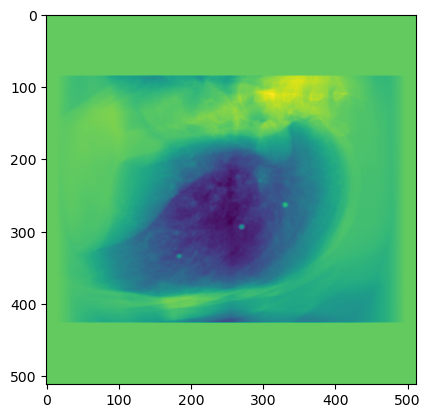

In [20]:
plt.imshow(y[:, 0, :],cmap='gray') # first projection
plt.imshow(y[:, 8, :]) # quarter rotation